# EDA on available data

Imports

In [26]:
import pandas as pd


## Reading in the available data and printing it out

In [24]:
ava = pd.read_pickle('../../data/ava_st1_ns4_56.pkl') 
print(ava)


       apcp_sf1_1  apcp_sf2_1 apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
V1       0.000000         0.0          1    0.000000    0.000000  256.492673   
V2       0.000000         0.0          1    0.017273    0.139091  257.998596   
V3       0.000000         0.0          1    0.000000    0.000000  219.280002   
V4       0.004545         0.0          1    0.000000    0.000000  267.863045   
V5       0.000000         0.0          1    0.000000    0.000000  238.162747   
...           ...         ...        ...         ...         ...         ...   
V4376    0.010909         0.0          1    0.000000    0.000000  278.168651   
V4377    0.000000         0.0          1    0.000000    0.000000  251.551092   
V4378    0.000000         0.0          1    0.000000    0.000000  269.446164   
V4379    0.000000         0.0          1    0.000000    0.000000  268.862049   
V4380    0.000000         0.0          1    0.000000    0.000000  269.112621   

       dlwrf_s2_1  dlwrf_s3_1  dlwrf_s4

In [30]:
print(max(ava.isnull().sum()))

0


In [34]:
# Shows all columns with only 1 unique value
constant_columns = [col for col in ava.columns if ava[col].nunique() < 2]
print(constant_columns)

['apcp_sf3_1', 'apcp_sf1_2', 'apcp_sf2_2', 'uswrf_s1_2']


In [36]:
print(ava.describe())


        apcp_sf1_1   apcp_sf2_1   apcp_sf4_1   apcp_sf5_1   dlwrf_s1_1  \
count  4380.000000  4380.000000  4380.000000  4380.000000  4380.000000   
mean      0.541082     0.241592     0.251330     0.472259   314.415219   
std       2.051574     1.062819     0.983976     1.691073    55.557847   
min       0.000000     0.000000     0.000000     0.000000   164.699043   
25%       0.000000     0.000000     0.000000     0.000000   267.855093   
50%       0.000000     0.000000     0.000000     0.000000   317.640138   
75%       0.082500     0.033636     0.013636     0.047500   365.174474   
max      28.769091    22.546364    24.410000    35.470909   422.193173   

        dlwrf_s2_1   dlwrf_s3_1   dlwrf_s4_1   dlwrf_s5_1   dswrf_s1_1  ...  \
count  4380.000000  4380.000000  4380.000000  4380.000000  4380.000000  ...   
mean    314.767405   322.404314   342.808427   342.269960     0.048817  ...   
std      57.776222    58.847925    61.455800    61.272028     0.225272  ...   
min     162.13334

Exception ignored in: <function ZipFile.__del__ at 0x1033c8900>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/zipfile.py", line 1870, in __del__
    self.close()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/zipfile.py", line 1887, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


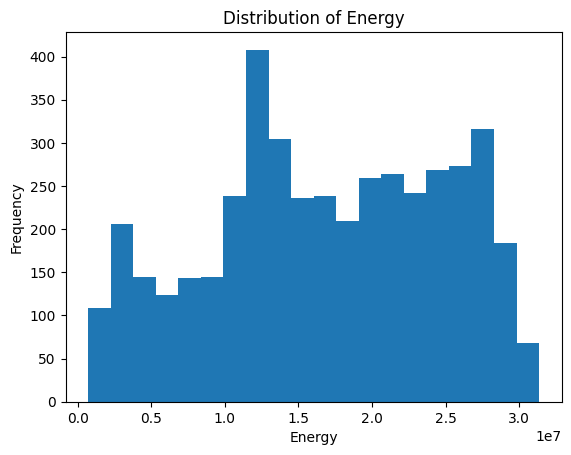

In [37]:
import matplotlib.pyplot as plt

plt.hist(ava['energy'], bins=20) 
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.title('Distribution of Energy')
plt.show()
